# Курсовая работа ура


In [2]:
import pandas as pd
import numpy as np
from scipy.stats import kurtosis, skew, normaltest, chisquare, norm
import matplotlib.pyplot as plt
import scipy.stats as st
import math
import sys
# !{sys.executable} -m pip install seaborn
import seaborn as sns

#### Тут парсим данные и все дела

In [13]:
import pickle
# !{sys.executable} -m pip install xlrd
import xlrd

# Open the Excel file
workbook = xlrd.open_workbook('data.xls')

# Select the active sheet (you can replace 'Sheet1' with the name of your sheet)
sheet = workbook.sheet_by_index(0)

data = {}
name = None
for row in [sheet.row(i) for i in range(1, sheet.nrows)]:
    
    if row[1].value >= 0:
        space = row[0].value.find(' ')
        data[name]['Месяц'].append(row[0].value[0:space])
        data[name]['Год'].append(int(row[0].value[space+1:space+5]))
        data[name]['Кг'].append(int(row[1].value))
        data[name]['Продажи'].append(float(row[2].value))
        data[name]['Количество'].append(int(row[3].value))
    else:
        name = row[0].value
        data[name] = {}
        data[name]['Месяц'] = []
        data[name]['Год'] = []
        data[name]['Кг'] = []
        data[name]['Продажи'] = []
        data[name]['Количество'] = []

with open('data.pickle', 'wb') as f:
    pickle.dump(data, f)

#### Строим графики, смотрим, анализируем

In [14]:
with open('data.pickle', 'rb') as f:
    data = pickle.load(f)

In [55]:
key = 'Молоко'

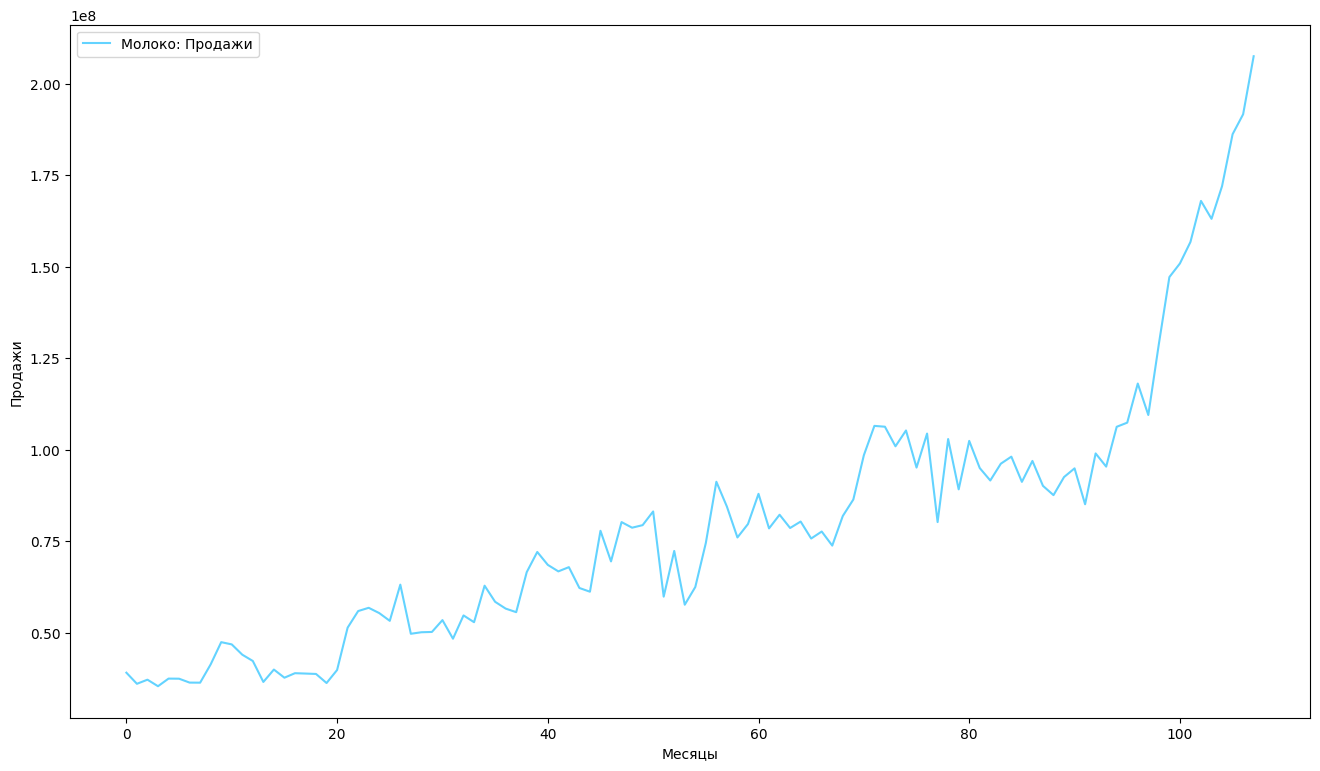

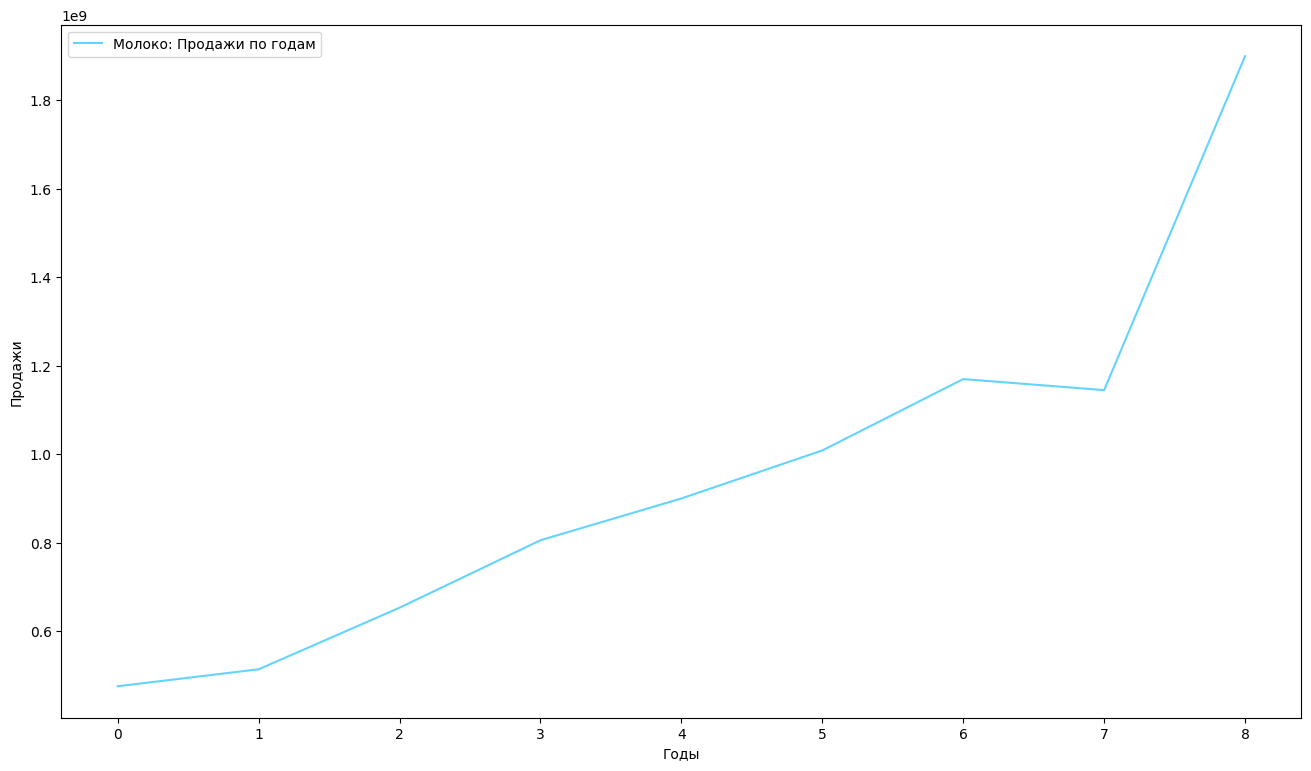

In [74]:
def years_sales(key):
    data[key]['Годы'] = list(set(data[key]['Год']))
    data[key]['ПродажиПоГодам'] = {}
    for i in range(len(data[key]['Продажи'])):
        year = data[key]['Год'][i]
        if data[key]['ПродажиПоГодам'].get(year) is None:
            data[key]['ПродажиПоГодам'][year] = 0
        data[key]['ПродажиПоГодам'][year] += data[key]['Продажи'][i]

def show_years_sales(key):
    plt.figure(figsize=(16, 9))
    sns.lineplot(x=range(len(data[key]['Месяц'])), y=data[key]['Продажи'], color='#63d3ff', label=key + ': Продажи')
    plt.xlabel('Месяцы')
    plt.ylabel('Продажи')
    plt.show()
    plt.figure(figsize=(16, 9))
    # х должен быть range от 0 иначе неправильный график
    sns.lineplot(x=range(len(data[key]['Годы'])), y=data[key]['ПродажиПоГодам'].values(), color='#63d3ff', label=key + ': Продажи по годам')
    plt.xlabel('Годы')
    plt.ylabel('Продажи')
    plt.show()

years_sales(key)
show_years_sales(key)

### Посмотрим продажи молока по годам

<Figure size 1600x900 with 0 Axes>

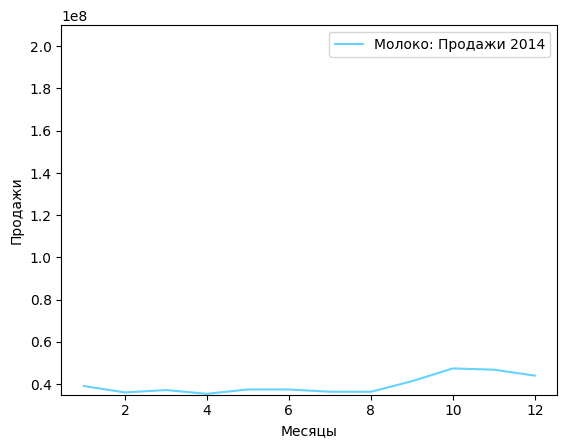

<Figure size 1600x900 with 0 Axes>

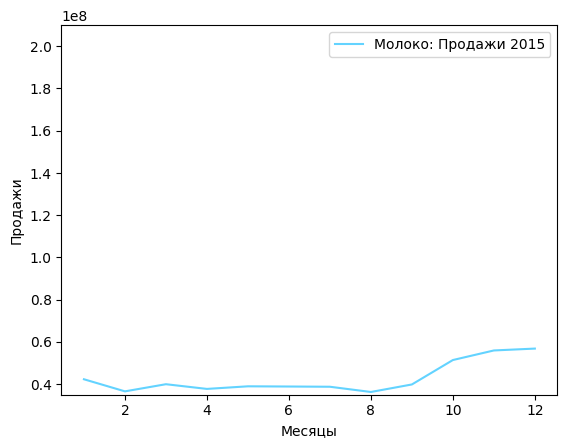

<Figure size 1600x900 with 0 Axes>

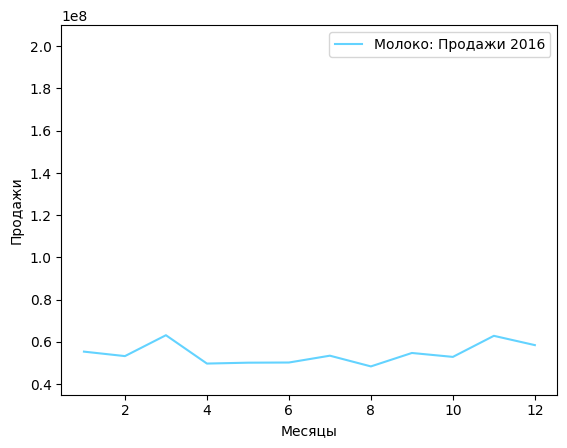

<Figure size 1600x900 with 0 Axes>

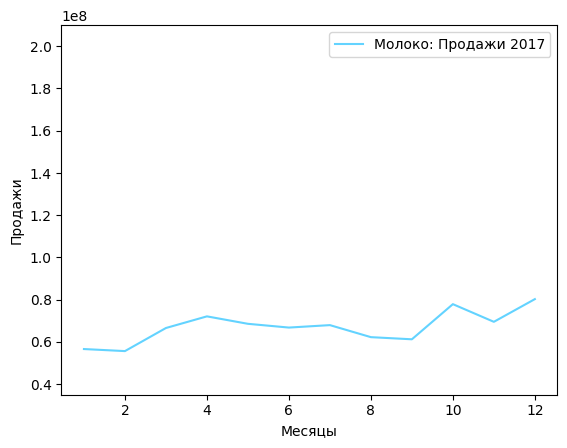

<Figure size 1600x900 with 0 Axes>

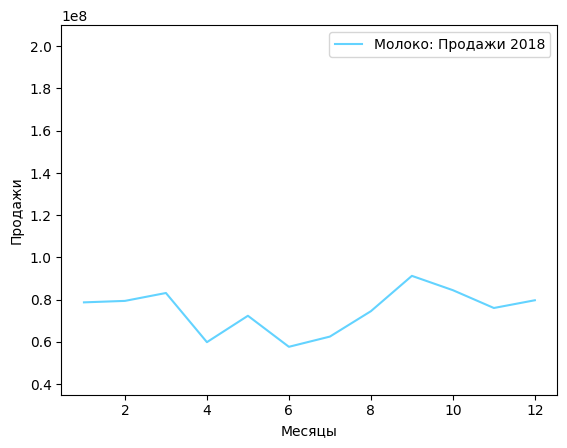

<Figure size 1600x900 with 0 Axes>

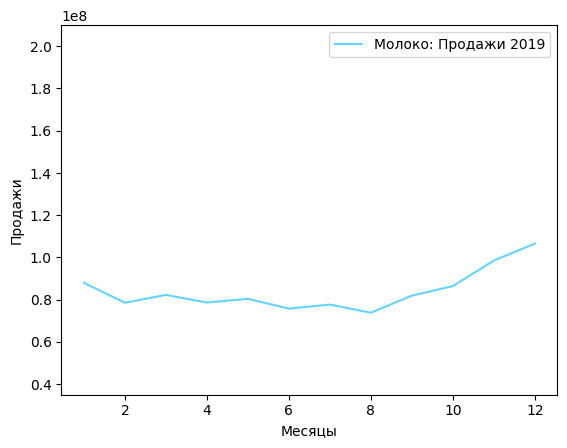

<Figure size 1600x900 with 0 Axes>

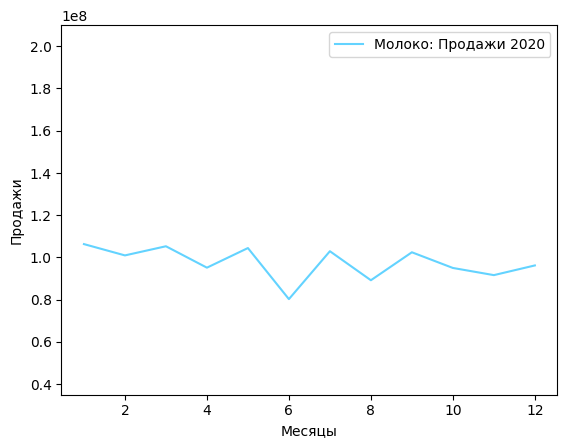

<Figure size 1600x900 with 0 Axes>

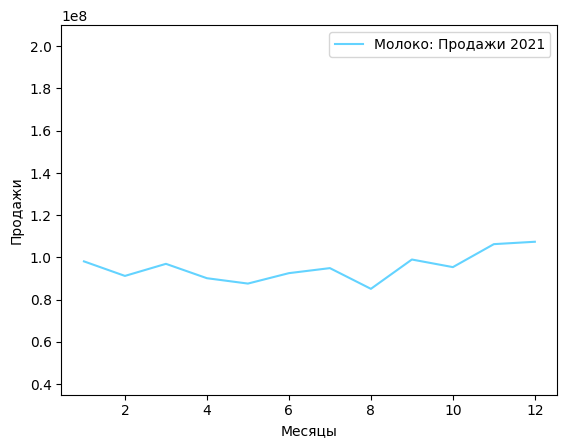

<Figure size 1600x900 with 0 Axes>

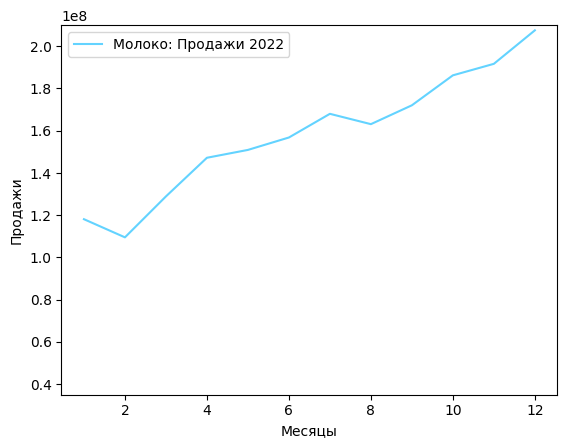

In [77]:
def each_year_monthly(key):
    data[key]['Годы'] = list(set(data[key]['Год']))
    data[key]['ПродажиПоГодам'] = {}
    for i in range(len(data[key]['Продажи'])):
        year = data[key]['Год'][i]
        if data[key]['ПродажиПоГодам'].get(year) is None:
            data[key]['ПродажиПоГодам'][year] = []
        data[key]['ПродажиПоГодам'][year].append(data[key]['Продажи'][i])

def show_each_year_monthly(key):
    for year, sales in data[key]['ПродажиПоГодам'].items():
        plt.figure(figsize=(16, 9))
        fig, ax = plt.subplots()
        sns.lineplot(x=range(1, len(sales) + 1), y=sales, color='#63d3ff', label=key + ': Продажи ' + str(year), ax=ax)
        ax.set_ylim(35000000, 210000000)
        plt.xlabel('Месяцы')
        plt.ylabel('Продажи')
        plt.show()

each_year_monthly(key)
show_each_year_monthly(key)

Замечаем, что в феврале всегда небольшая просадка

В марте во всех годах наблюдается рост

В апреле во всех годах снова просадка, кроме 2017 года

Май неоднозначен, в половине годов - просадка, в половине - рост

В июне - просадка, в июле она еще более ярко выражена

К концу года же наблюдается рост относительно основного тренда, не всегда большой


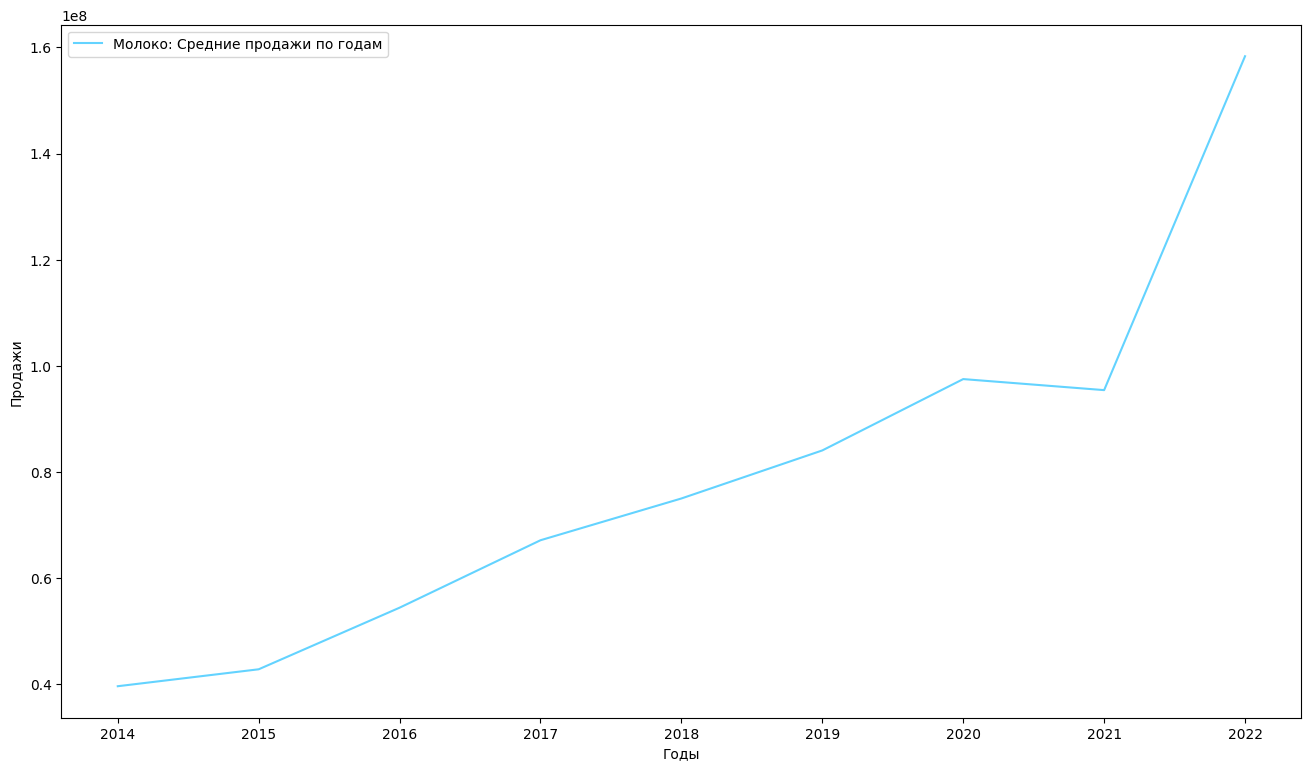

In [88]:
def years_mean(key):
    data[key]['СреднееПоГодам'] = {}
    for year in range(2014, 2023):
        data[key]['СреднееПоГодам'][year] = np.mean(data[key]['ПродажиПоГодам'][year])

def show_years_mean(key):
    plt.figure(figsize=(16, 9))
    sns.lineplot(x=data[key]['СреднееПоГодам'].keys(), y=data[key]['СреднееПоГодам'].values(), color='#63d3ff', label=key + ': Средние продажи по годам')
    plt.xlabel('Годы')
    plt.ylabel('Продажи')
    plt.show()

years_mean(key)
show_years_mean(key)

In [82]:
months = ['Январь', 'Февраль', 'Март', 'Апрель', 'Май', 'Июнь', 'Июль', 'Август', 'Сентябрь', 'Октябрь', 'Ноябрь', 'Декабрь']
months_short = list(map(lambda x: x[:3], data[key]['СреднееПоМесяцам'].keys()))

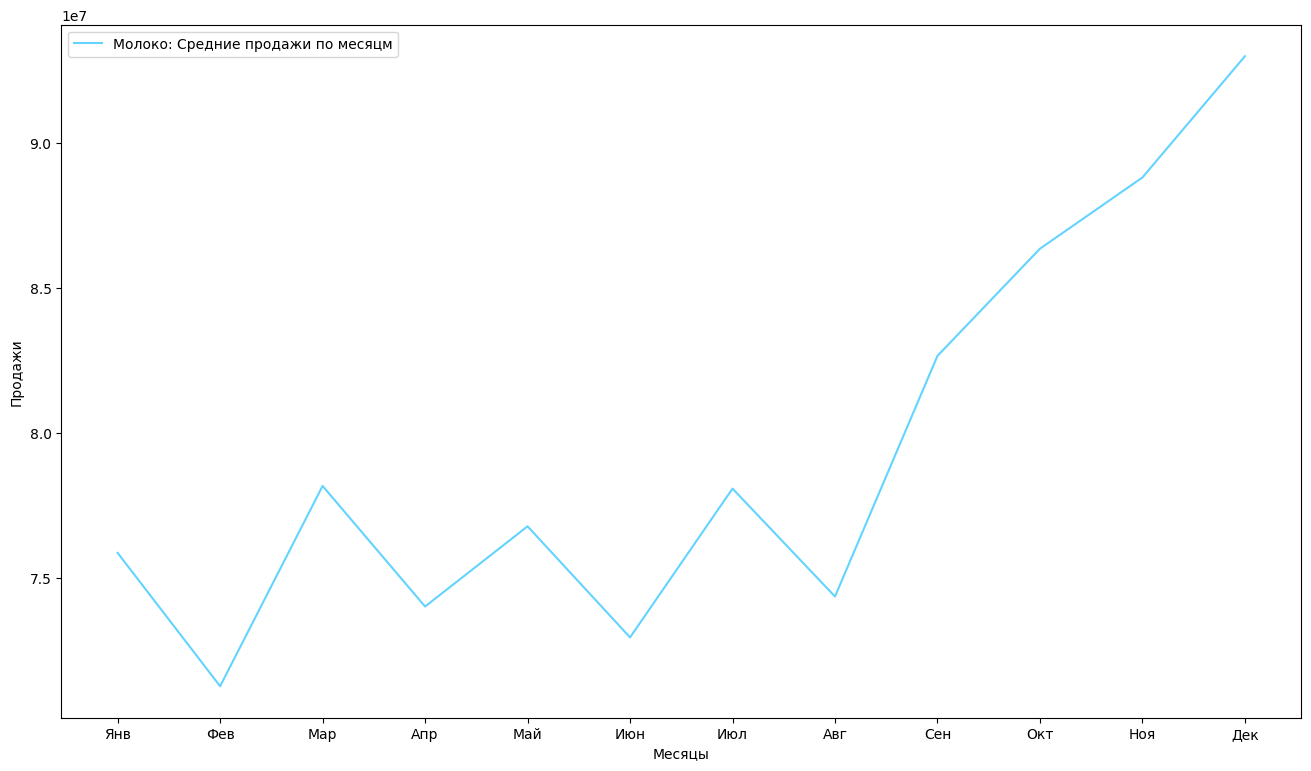

In [89]:
def months_mean(key):
    data[key]['ПродажиПоМесяцам'] = {}
    data[key]['СреднееПоМесяцам'] = {}
    for month in months:
        data[key]['ПродажиПоМесяцам'][month] = []

    for i in range(len(data[key]['Продажи'])):
        data[key]['ПродажиПоМесяцам'][data[key]['Месяц'][i]].append(data[key]['Продажи'][i])

    for month, arr in data[key]['ПродажиПоМесяцам'].items():
        data[key]['СреднееПоМесяцам'][month] = np.mean(arr)

def show_months_mean(key):
    plt.figure(figsize=(16, 9))
    sns.lineplot(x=months_short, y=data[key]['СреднееПоМесяцам'].values(), color='#63d3ff', label=key + ': Средние продажи по месяцм')
    plt.xlabel('Месяцы')
    plt.ylabel('Продажи')
    plt.show()

months_mean(key)
show_months_mean(key)

### Тут посчитаем индексы сезонности

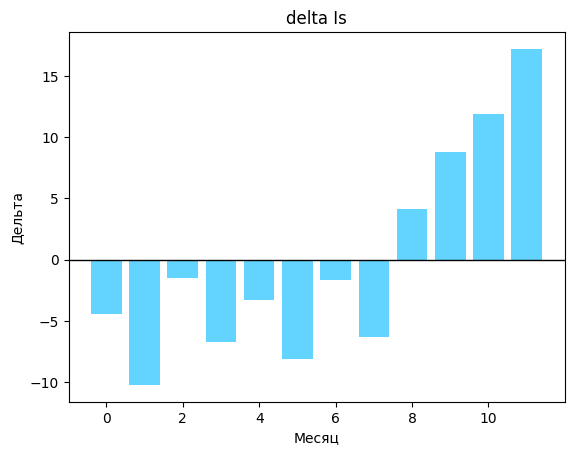

In [102]:
years_mean_mean = np.mean(list(data[key]['СреднееПоГодам'].values()))

def season_index(key):
    data[key]['ИндексСезонности'] = {}
    data[key]['ИндексСезонностиПрирост'] = {}
    for month in months:
        data[key]['ИндексСезонности'][month] = data[key]['СреднееПоМесяцам'][month] * 100 / years_mean_mean 
        data[key]['ИндексСезонностиПрирост'][month] = data[key]['ИндексСезонности'][month] - 100

def show_season_index(key):
    fig, ax = plt.subplots()
    ax.bar(np.arange(len(months)), np.maximum(list(data[key]['ИндексСезонностиПрирост'].values()), 0), color='#63d3ff')
    ax.bar(np.arange(len(months)), np.minimum(list(data[key]['ИндексСезонностиПрирост'].values()), 0), color='#63d3ff')
    ax.axhline(0, color='black', linewidth=1)
    ax.set_xlabel('Месяц')
    ax.set_ylabel('Дельта')
    plt.title('delta Is')
    plt.show()

season_index(key)
show_season_index(key)